In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
# Load the original full image
im_dir = r"C:\Users\skaze\OneDrive\Usef's Project\dataset\saber kokey\saber kokey"
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the directory containing the images
im_dir = r"C:\Users\skaze\OneDrive\Usef's Project\dataset\saber kokey\saber kokey"

# Loop through all image IDs
for i in range(1, 1229):
    im_id = f"{i}.jpg"  # Construct the filename
    full_im_addr = os.path.join(im_dir, im_id)

    # Load the full image
    full_image = cv2.imread(full_im_addr)
    if full_image is None:
        print(f"Image {im_id} not found, skipping...")
        continue  # Skip if the image doesn't exist

    # Get the dimensions of the full image
    height, width = full_image.shape[:2]
    print(f"Processing {im_id}: Height={height}, Width={width}")

    # Define the southwest quadrant (bottom-left)
    x_start = 0
    y_start = height // 2
    x_end = width // 2
    y_end = height

    # Crop the southwest quadrant
    sw_quadrant = full_image[y_start:y_end, x_start:x_end]

#     # Convert to grayscale
#     gray_sw = cv2.cvtColor(sw_quadrant, cv2.COLOR_BGR2GRAY)

#     # Perform binary segmentation using thresholding
#     # You can adjust the threshold value (e.g., 127) based on your needs
#     _, binary_segmented = cv2.threshold(gray_sw, 40, 255, cv2.THRESH_BINARY)

#     # Show the segmented image
#     plt.figure(figsize=(12, 6))

#     # Original cropped quadrant
#     plt.subplot(1, 2, 1)
#     plt.imshow(cv2.cvtColor(sw_quadrant, cv2.COLOR_BGR2RGB))
#     plt.title("Southwest Quadrant (Original)")
#     plt.axis("off")

#     # Binary segmented quadrant
#     plt.subplot(1, 2, 2)
#     plt.imshow(binary_segmented, cmap="gray")
#     plt.title("Binary Segmentation")
#     plt.axis("off")

#     # Show the results
#     plt.show()

#     # Save the segmented image (optional)
#     segmented_filename = f"segmented_{i}.jpg"
#     cv2.imwrite(segmented_filename, binary_segmented)
#     print(f"Segmented image saved as {segmented_filename}")

#     # Convert the southwest quadrant to grayscale
# gray_sw_quadrant = cv2.cvtColor(sw_quadrant, cv2.COLOR_BGR2GRAY)

# # Load the target template (the cropped part)
# template = cv2.imread('template.jpg', 0)  # Replace with the filename of the template part
# w, h = template.shape[::-1]

# # Match the template in the southwest quadrant
# res = cv2.matchTemplate(gray_sw_quadrant, template, cv2.TM_CCOEFF_NORMED)
# threshold = 0.8 # Adjust the threshold as needed
# loc = np.where(res >= threshold)

# # Annotate and crop the detected area
# for pt in zip(*loc[::-1]):  # Switch x and y coordinates
#     # Adjust the coordinates to the original image
#     top_left = (pt[0] + x_start, pt[1] + y_start)
#     bottom_right = (top_left[0] + w, top_left[1] + h)

#     # Draw rectangle for visualization
#     cv2.rectangle(full_image, top_left, bottom_right, (255, 0, 0), 2)

#     # Crop the matched region from the original image
#     cropped_part = full_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
#     cv2.imwrite('cropped_output.jpg', cropped_part)  # Save the cropped part
#     print("Cropped part saved as 'cropped_output.jpg'")
#     break  # Only process the fir



Processing 1.jpg: Height=1400, Width=1120
Processing 2.jpg: Height=1343, Width=1075
Processing 3.jpg: Height=1247, Width=998
Processing 4.jpg: Height=1247, Width=998
Processing 5.jpg: Height=1440, Width=1152
Processing 6.jpg: Height=1343, Width=1075
Processing 7.jpg: Height=1400, Width=1120
Processing 8.jpg: Height=1400, Width=1120
Processing 9.jpg: Height=1151, Width=921
Processing 10.jpg: Height=1400, Width=1120
Processing 11.jpg: Height=1400, Width=1120
Processing 12.jpg: Height=1400, Width=1120
Processing 13.jpg: Height=1400, Width=1120
Processing 14.jpg: Height=1400, Width=1120
Processing 15.jpg: Height=1343, Width=1075
Processing 16.jpg: Height=1400, Width=1120
Processing 17.jpg: Height=1400, Width=1120
Processing 18.jpg: Height=1343, Width=1075
Processing 19.jpg: Height=1400, Width=1120
Processing 20.jpg: Height=1400, Width=1120
Processing 21.jpg: Height=1400, Width=1120
Processing 22.jpg: Height=1247, Width=998
Processing 23.jpg: Height=1343, Width=1075
Processing 24.jpg: Heigh

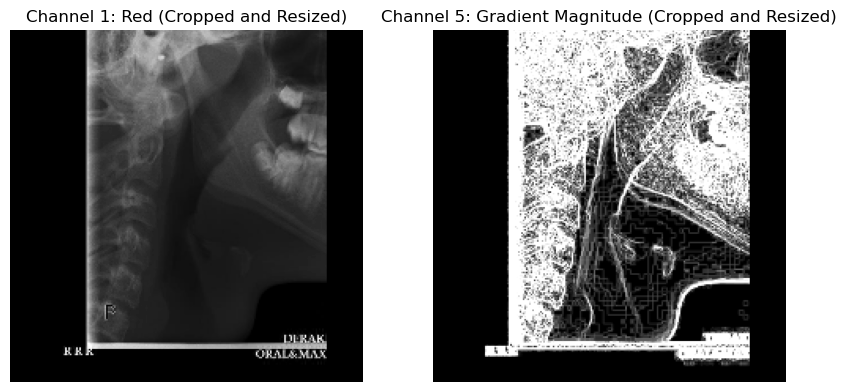

In [31]:
import cv2
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
import os

def extract_acf_features(image):
    """
    Extract Aggregate Channel Features (ACF) from an image.
    Returns: A list of feature channels (numpy arrays).
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Channel 1: RGB channels
    r, g, b = cv2.split(image)
    
    # Channel 5: Gradient Magnitude
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)
    
    return r, gradient_magnitude  # Return only Channel 1 and Channel 5


def crop_and_resize(image, target_size=(224, 224)):
    """
    Crop the southwest quadrant of the image and resize it to the target size
    while maintaining the aspect ratio.
    """
    # Get dimensions of the image
    height, width = image.shape[:2]
    
    # Define the southwest quadrant (bottom-left)
    x_start = 0
    y_start = height // 2
    x_end = width // 2
    y_end = height

    # Crop the southwest quadrant
    cropped = image[y_start:y_end, x_start:x_end]

    # Calculate aspect ratio
    h, w = cropped.shape[:2]
    aspect_ratio = w / h

    # Resize while maintaining aspect ratio
    if aspect_ratio > 1:  # Wider than tall
        new_w = target_size[1]
        new_h = int(new_w / aspect_ratio)
    else:  # Taller than wide
        new_h = target_size[0]
        new_w = int(new_h * aspect_ratio)

    resized = cv2.resize(cropped, (new_w, new_h))

    # Pad the resized image to make it exactly target_size
    pad_top = (target_size[0] - new_h) // 2
    pad_bottom = target_size[0] - new_h - pad_top
    pad_left = (target_size[1] - new_w) // 2
    pad_right = target_size[1] - new_w - pad_left

    padded = cv2.copyMakeBorder(
        resized, pad_top, pad_bottom, pad_left, pad_right,
        borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0]  # Black padding
    )

    return padded


# Main Script
im_dir = r"C:\Users\skaze\OneDrive\Usef's Project\dataset\saber kokey\saber kokey"
im_id = f"{248}.jpg"  # Replace with your image index
full_im_addr = os.path.join(im_dir, im_id)

# Load the full image
full_image = cv2.imread(full_im_addr)
if full_image is None:
    print(f"Image not found: {full_im_addr}")
    exit()

# Extract Channel 1 and Channel 5
channel_1, channel_5 = extract_acf_features(full_image)

# Crop and resize Channel 1 and Channel 5
cropped_resized_1 = crop_and_resize(channel_1)
cropped_resized_5 = crop_and_resize(channel_5)

# Plot the results
plt.figure(figsize=(10, 5))

# Channel 1 (Red)
plt.subplot(1, 2, 1)
plt.imshow(cropped_resized_1, cmap="gray")
plt.title("Channel 1: Red (Cropped and Resized)")
plt.axis("off")

# Channel 5 (Gradient Magnitude)
plt.subplot(1, 2, 2)
plt.imshow(cropped_resized_5, cmap="gray")
plt.title("Channel 5: Gradient Magnitude (Cropped and Resized)")
plt.axis("off")

plt.show()


In [74]:
import torch
import pandas as pd
class XRayDataset(Dataset):
    def __init__(self, csv_path, image_dir, transform=None, target_size=(224, 224)):
        """
        Dataset constructor.
        Args:
            csv_path: Path to the CSV file (first column: image_id, second column: label).
            image_dir: Directory containing the images.
            transform: Optional torchvision transforms for data augmentation.
            target_size: Tuple (height, width) for resizing.
        """
        self.data = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.target_size = target_size

    def __len__(self):
        # Each original image contributes two samples (Channel 1 and Channel 5)
        return len(self.data) * 2

    def __getitem__(self, idx):
        # Map index to the original image and channel
        original_idx = idx // 2  # Floor division to get the original image index
        is_channel_1 = idx % 2 == 0  # Even index -> Channel 1, Odd index -> Channel 5

        # Get image ID and label from the CSV
        row = self.data.iloc[original_idx]
        image_id = int(row[0])  # First column: image ID
        label = row[1]          # Second column: label

        # Construct the image path and load the image
        image_path = os.path.join(self.image_dir, f"{image_id}.jpg")
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found: {image_path}")

        # Crop the southwest quadrant
        cropped_image = self.crop_southwest_quadrant(image)

        # Extract Channel 1 (Red) and Channel 5 (Gradient Magnitude)
        channel_1, channel_5 = self.extract_acf_features(cropped_image)

        # Select the channel based on `is_channel_1`
        selected_channel = channel_1 if is_channel_1 else channel_5

        # Resize the selected channel while maintaining aspect ratio
        selected_channel = self.resize_with_aspect_ratio(selected_channel, self.target_size)

        # Apply data augmentation (if transform is provided)
        if self.transform:
            selected_channel = self.apply_transforms(selected_channel)

        # Convert to tensor and return
        return (
            torch.tensor(selected_channel, dtype=torch.float32).unsqueeze(0),  # Add channel dimension
            torch.tensor(int(label.replace('cs', '')), dtype=torch.long)      # Label
        )

    def crop_southwest_quadrant(self, image):
        """
        Crop the southwest quadrant (bottom-left) of the image.
        """
        # Get dimensions of the image
        height, width = image.shape[:2]

        # Define the southwest quadrant
        x_start = 0
        y_start = height // 2
        x_end = width // 2
        y_end = height

        # Crop the southwest quadrant
        cropped_image = image[y_start:y_end, x_start:x_end]
        return cropped_image

    def extract_acf_features(self, image):
        """
        Extract Channel 1 (Red) and Channel 5 (Gradient Magnitude) from an image.
        """
        # Channel 1: Red
        r, _, _ = cv2.split(image)

        # Channel 5: Gradient Magnitude
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
        gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

        return r, gradient_magnitude

    def resize_with_aspect_ratio(self, image, target_size):
        """
        Resize an image to the target size while maintaining its aspect ratio.
        """
        h, w = image.shape[:2]
        aspect_ratio = w / h

        if aspect_ratio > 1:  # Wider than tall
            new_w = target_size[1]
            new_h = int(new_w / aspect_ratio)
        else:  # Taller than wide
            new_h = target_size[0]
            new_w = int(new_h * aspect_ratio)

        resized = cv2.resize(image, (new_w, new_h))

        # Pad the resized image to make it exactly target_size
        pad_top = (target_size[0] - new_h) // 2
        pad_bottom = target_size[0] - new_h - pad_top
        pad_left = (target_size[1] - new_w) // 2
        pad_right = target_size[1] - new_w - pad_left

        padded = cv2.copyMakeBorder(
            resized, pad_top, pad_bottom, pad_left, pad_right,
            borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0]
        )
        return padded

    def apply_transforms(self, image):
        """
        Apply torchvision transformations to an image.
        """
        # Convert numpy image to PIL image for compatibility with torchvision
        image = T.ToPILImage()(image)

        # Apply random augmentations
        transform = T.Compose([
            T.RandomHorizontalFlip(p=0.5),
            T.RandomVerticalFlip(p=0.5),
            T.RandomRotation(degrees=30),
            T.RandomResizedCrop(size=self.target_size, scale=(0.8, 1.0)),
            T.ToTensor()
        ])
        augmented = transform(image)

        # Convert back to numpy array
        return augmented.numpy().squeeze()



torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])


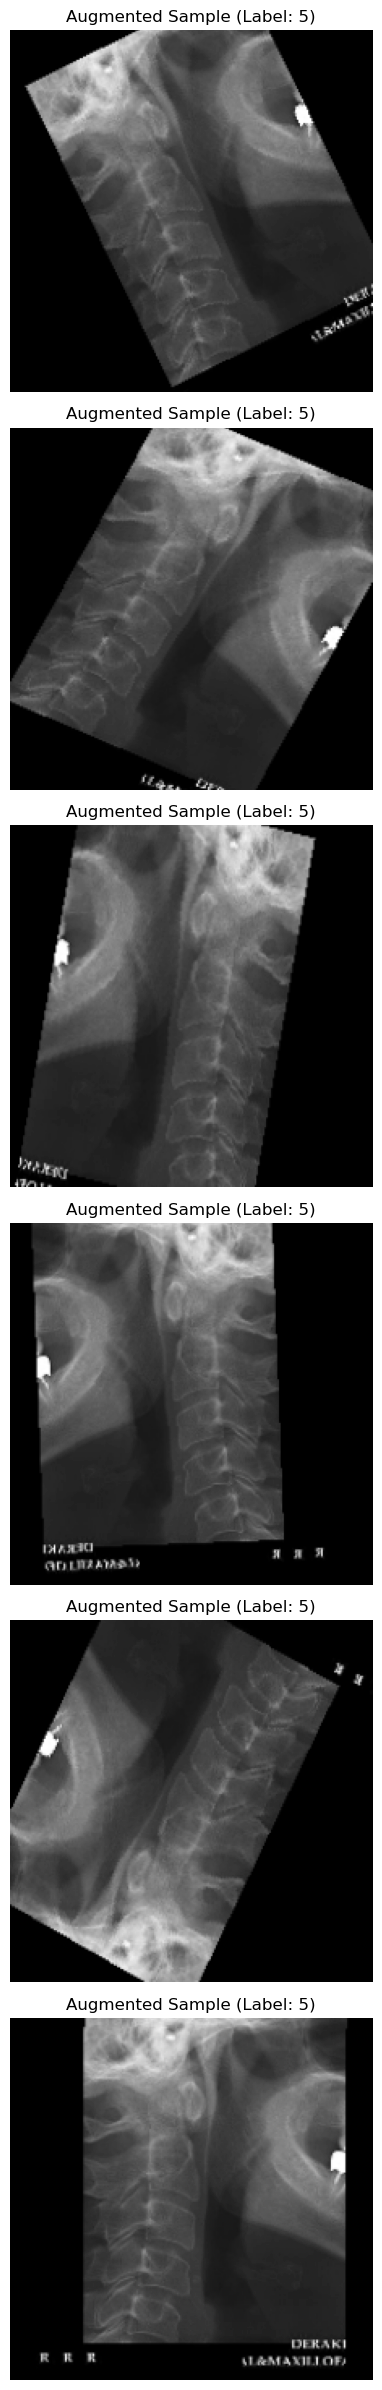

In [78]:
import matplotlib.pyplot as plt

# Define paths
csv_path = r"C:\Users\skaze\OneDrive\Usef's Project\dataset\output.csv"  # CSV file containing image IDs and labels
image_dir = r"C:\Users\skaze\OneDrive\Usef's Project\dataset\saber kokey\saber kokey"

# Initialize dataset
dataset = XRayDataset(csv_path, image_dir, transform=True)

index = 0  # Index of the sample in the dataset

# Number of augmented samples to generate
num_augmentations = 6  

# Fetch the original sample and repeatedly apply augmentation
fig, axes = plt.subplots(num_augmentations, 1, figsize=(8, num_augmentations * 4))

for i in range(num_augmentations):
    # Fetch an augmented version of the sample
    input_tensor, label = dataset[index]  # Unpack the tuple
    print(input_tensor.shape)  # Check the shape of the input tensor

    # Plot the input tensor
    axes[i].imshow(input_tensor.squeeze(), cmap="gray")  # Squeeze to remove channel dim
    axes[i].set_title(f"Augmented Sample (Label: {label.item()})")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [80]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset

# Define file paths
csv_path = r"C:\Users\skaze\OneDrive\Usef's Project\dataset\output.csv"  # CSV file path
image_dir = r"C:\Users\skaze\OneDrive\Usef's Project\dataset\saber kokey\saber kokey"  # Image directory

# Initialize the dataset
dataset = XRayDataset(csv_path, image_dir, transform=True)

# Split indices for train/val/test (80/10/10)
dataset_size = len(dataset)
indices = list(range(dataset_size))
train_indices, temp_indices = train_test_split(indices, test_size=0.2, random_state=42)
val_indices, test_indices = train_test_split(temp_indices, test_size=0.5, random_state=42)

# Subset datasets
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

# Create data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print dataset sizes for verification
print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 1966
Validation size: 246
Test size: 246


In [82]:

import torch
import torch.nn as nn
import torchvision.models as models

class ResNet18Classifier(nn.Module):
    def __init__(self, num_classes=6):
        super(ResNet18Classifier, self).__init__()
        
        # Load pre-trained ResNet-18 model
        self.base_model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        
        # Modify the first convolutional layer to accept 2 input channels
        self.base_model.conv1 = nn.Conv2d(
            in_channels=2,  # Two input channels: Channel 1 and Channel 5
            out_channels=64,
            kernel_size=(7, 7),
            stride=(2, 2),
            padding=(3, 3),
            bias=False
        )
        
        # Freeze all the layers of the base model
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Replace the classification head with a custom head
        # Input features: 512 (output of ResNet-18 backbone)
        self.base_model.fc = nn.Sequential(
            nn.Linear(512, 256),  # Reduce features from 512 to 256
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)  # Final layer for 6-class output
        )
        
        # Count trainable parameters for verification
        self.count_trainable_params()

    def count_trainable_params(self):
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"Trainable parameters: {trainable_params}")

    def forward(self, x):
        return self.base_model(x)


In [85]:
import torch.nn as nn
import torchvision.models as models

class ResNet18Classifier(nn.Module):
    def __init__(self, num_classes=6):
        super(ResNet18Classifier, self).__init__()
        
        # Load pre-trained ResNet-18 model
        self.base_model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        
        # Modify the first convolutional layer to accept 1 input channel
        self.base_model.conv1 = nn.Conv2d(
            in_channels=1,  # Single-channel input
            out_channels=64,
            kernel_size=(7, 7),
            stride=(2, 2),
            padding=(3, 3),
            bias=False
        )
        
        # Replace the classification head with a custom head
        self.base_model.fc = nn.Sequential(
            nn.Linear(512, 256),  # Reduce features from 512 to 256
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)  # Final layer for 6-class output
        )
        
        # Count trainable parameters for verification
        self.count_trainable_params()

    def count_trainable_params(self):
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"Trainable parameters: {trainable_params}")

    def forward(self, x):
        return self.base_model(x)


In [86]:
for inputs, labels in train_loader:
    print(f"Input shape: {inputs.shape}, Label shape: {labels.shape}")
    break


Input shape: torch.Size([32, 1, 224, 224]), Label shape: torch.Size([32])


In [87]:
# Training Loop
for epoch in range(5):  # Number of epochs
    model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)  # Move inputs to GPU if available
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\skaze\anaconda3\envs\usef_env\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\skaze\AppData\Local\Temp\ipykernel_22584\2202330522.py", line 10, in <module>
    outputs = model(inputs)
  File "c:\Users\skaze\anaconda3\envs\usef_env\lib\site-packages\torch\nn\modules\module.py", line 1553, in _wrapped_call_impl
    full_backward_hooks, non_full_backward_hooks = self._get_backward_hooks()
  File "c:\Users\skaze\anaconda3\envs\usef_env\lib\site-packages\torch\nn\modules\module.py", line 1562, in _call_impl
    if args_kwargs_result is not None:
  File "C:\Users\skaze\AppData\Local\Temp\ipykernel_22584\3409643055.py", line 43, in forward
    return self.base_model(x)
  File "c:\Users\skaze\anaconda3\envs\usef_env\lib\site-packages\torch\nn\modules\module.py", line 1553, in _wrapped_call_impl
    full_backward_hooks, non_full_backward_hooks = 

In [ ]:
# Initialize the model
num_classes = 6
model = ResNet18Classifier(num_classes=num_classes)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)  # Move inputs to GPU if available
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total * 100
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%")

# Validation Loop
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

val_acc = correct / total * 100
print(f"Validation Accuracy: {val_acc:.2f}%")



Trainable parameters: 132870
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\skaze\anaconda3\envs\usef_env\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\skaze\AppData\Local\Temp\ipykernel_22584\3116867444.py", line 26, in <module>
    outputs = model(inputs)
  File "c:\Users\skaze\anaconda3\envs\usef_env\lib\site-packages\torch\nn\modules\module.py", line 1553, in _wrapped_call_impl
    full_backward_hooks, non_full_backward_hooks = self._get_backward_hooks()
  File "c:\Users\skaze\anaconda3\envs\usef_env\lib\site-packages\torch\nn\modules\module.py", line 1562, in _call_impl
    if args_kwargs_result is not None:
  File "C:\Users\skaze\AppData\Local\Temp\ipykernel_22584\3409643055.py", line 43, in forward
    return self.base_model(x)
  File "c:\Users\skaze\anaconda3\envs\usef_env\lib\site-packages\torch\nn\modules\module.py", line 1553, in _wrapped_call_impl
    full_backward_hooks, non_full_backward_hooks = 